## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0065066	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9855502	total: 59.6ms	remaining: 29.7s
2:	learn: 0.9658439	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9484660	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9319940	total: 62.6ms	remaining: 12.5s
5:	learn: 0.9146343	total: 63.5ms	remaining: 10.5s
6:	learn: 0.8972354	total: 64.5ms	remaining: 9.15s
7:	learn: 0.8813336	total: 65.5ms	remaining: 8.13s
8:	learn: 0.8651665	total: 66.5ms	remaining: 7.32s
9:	learn: 0.8487047	total: 67.4ms	remaining: 6.67s
10:	learn: 0.8317565	total: 68.4ms	remaining: 6.15s
11:	learn: 0.8166416	total: 69.3ms	remaining: 5.7s
12:	learn: 0.8025818	total: 70.1ms	remaining: 5.32s
13:	learn: 0.7874190	total: 70.8ms	remaining: 4.99s
14:	learn: 0.7747239	total: 71.7ms	remaining: 4.71s
15:	learn: 0.7608442	total: 72.6ms	remaining: 4.46s
16:	learn: 0.7490836	total: 73.4ms	remaining: 4.25s
17:	learn: 0.7369703	total: 74.3ms	remaining: 4.05s
18:	learn: 0.7242741	total: 75.3ms	remaining:

58:	learn: 0.4308184	total: 107ms	remaining: 1.71s
59:	learn: 0.4265936	total: 108ms	remaining: 1.7s
60:	learn: 0.4220090	total: 109ms	remaining: 1.68s
61:	learn: 0.4178659	total: 110ms	remaining: 1.66s
62:	learn: 0.4146689	total: 111ms	remaining: 1.65s
63:	learn: 0.4101008	total: 111ms	remaining: 1.63s
64:	learn: 0.4066976	total: 112ms	remaining: 1.61s
65:	learn: 0.4019136	total: 113ms	remaining: 1.6s
66:	learn: 0.3985292	total: 114ms	remaining: 1.59s
67:	learn: 0.3951887	total: 115ms	remaining: 1.57s
68:	learn: 0.3921766	total: 115ms	remaining: 1.56s
69:	learn: 0.3895095	total: 116ms	remaining: 1.54s
70:	learn: 0.3856459	total: 117ms	remaining: 1.53s
71:	learn: 0.3831037	total: 118ms	remaining: 1.52s
72:	learn: 0.3798042	total: 119ms	remaining: 1.51s
73:	learn: 0.3763811	total: 119ms	remaining: 1.5s
74:	learn: 0.3732522	total: 120ms	remaining: 1.48s
75:	learn: 0.3701329	total: 121ms	remaining: 1.47s
76:	learn: 0.3667380	total: 122ms	remaining: 1.46s
77:	learn: 0.3643342	total: 123ms	

144:	learn: 0.2602257	total: 178ms	remaining: 1.05s
145:	learn: 0.2594078	total: 179ms	remaining: 1.05s
146:	learn: 0.2582655	total: 180ms	remaining: 1.05s
147:	learn: 0.2573987	total: 181ms	remaining: 1.04s
148:	learn: 0.2563907	total: 182ms	remaining: 1.04s
149:	learn: 0.2558417	total: 183ms	remaining: 1.04s
150:	learn: 0.2544561	total: 184ms	remaining: 1.03s
151:	learn: 0.2535210	total: 185ms	remaining: 1.03s
152:	learn: 0.2529696	total: 186ms	remaining: 1.03s
153:	learn: 0.2519133	total: 187ms	remaining: 1.02s
154:	learn: 0.2507802	total: 188ms	remaining: 1.02s
155:	learn: 0.2498667	total: 189ms	remaining: 1.02s
156:	learn: 0.2491349	total: 190ms	remaining: 1.02s
157:	learn: 0.2484317	total: 191ms	remaining: 1.02s
158:	learn: 0.2475790	total: 192ms	remaining: 1.01s
159:	learn: 0.2470907	total: 193ms	remaining: 1.01s
160:	learn: 0.2462958	total: 194ms	remaining: 1.01s
161:	learn: 0.2454348	total: 195ms	remaining: 1.01s
162:	learn: 0.2447341	total: 195ms	remaining: 1s
163:	learn: 0.2

264:	learn: 0.1847647	total: 282ms	remaining: 782ms
265:	learn: 0.1843309	total: 283ms	remaining: 780ms
266:	learn: 0.1837756	total: 284ms	remaining: 779ms
267:	learn: 0.1834205	total: 284ms	remaining: 777ms
268:	learn: 0.1830561	total: 285ms	remaining: 775ms
269:	learn: 0.1826764	total: 286ms	remaining: 774ms
270:	learn: 0.1823587	total: 287ms	remaining: 772ms
271:	learn: 0.1818983	total: 288ms	remaining: 770ms
272:	learn: 0.1816179	total: 289ms	remaining: 768ms
273:	learn: 0.1812213	total: 290ms	remaining: 767ms
274:	learn: 0.1809157	total: 290ms	remaining: 766ms
275:	learn: 0.1806703	total: 291ms	remaining: 764ms
276:	learn: 0.1802312	total: 292ms	remaining: 762ms
277:	learn: 0.1796665	total: 293ms	remaining: 761ms
278:	learn: 0.1792350	total: 294ms	remaining: 759ms
279:	learn: 0.1787332	total: 295ms	remaining: 758ms
280:	learn: 0.1782978	total: 295ms	remaining: 756ms
281:	learn: 0.1779743	total: 296ms	remaining: 754ms
282:	learn: 0.1776657	total: 297ms	remaining: 753ms
283:	learn: 

367:	learn: 0.1495193	total: 368ms	remaining: 632ms
368:	learn: 0.1493001	total: 369ms	remaining: 631ms
369:	learn: 0.1491745	total: 370ms	remaining: 630ms
370:	learn: 0.1488393	total: 371ms	remaining: 629ms
371:	learn: 0.1485020	total: 371ms	remaining: 627ms
372:	learn: 0.1483883	total: 372ms	remaining: 626ms
373:	learn: 0.1481490	total: 373ms	remaining: 625ms
374:	learn: 0.1477649	total: 374ms	remaining: 623ms
375:	learn: 0.1476452	total: 375ms	remaining: 622ms
376:	learn: 0.1474067	total: 376ms	remaining: 621ms
377:	learn: 0.1470134	total: 376ms	remaining: 620ms
378:	learn: 0.1467153	total: 377ms	remaining: 618ms
379:	learn: 0.1463877	total: 378ms	remaining: 617ms
380:	learn: 0.1461428	total: 379ms	remaining: 615ms
381:	learn: 0.1458435	total: 380ms	remaining: 614ms
382:	learn: 0.1455701	total: 380ms	remaining: 613ms
383:	learn: 0.1453755	total: 381ms	remaining: 611ms
384:	learn: 0.1450299	total: 382ms	remaining: 610ms
385:	learn: 0.1448919	total: 383ms	remaining: 609ms
386:	learn: 

492:	learn: 0.1220176	total: 472ms	remaining: 486ms
493:	learn: 0.1216322	total: 473ms	remaining: 485ms
494:	learn: 0.1213225	total: 474ms	remaining: 483ms
495:	learn: 0.1209838	total: 475ms	remaining: 482ms
496:	learn: 0.1208696	total: 475ms	remaining: 481ms
497:	learn: 0.1207048	total: 476ms	remaining: 480ms
498:	learn: 0.1204173	total: 477ms	remaining: 479ms
499:	learn: 0.1201554	total: 478ms	remaining: 478ms
500:	learn: 0.1198977	total: 479ms	remaining: 477ms
501:	learn: 0.1197997	total: 480ms	remaining: 476ms
502:	learn: 0.1195220	total: 481ms	remaining: 475ms
503:	learn: 0.1193289	total: 482ms	remaining: 474ms
504:	learn: 0.1192151	total: 483ms	remaining: 473ms
505:	learn: 0.1190537	total: 484ms	remaining: 472ms
506:	learn: 0.1189159	total: 484ms	remaining: 471ms
507:	learn: 0.1188496	total: 485ms	remaining: 470ms
508:	learn: 0.1185986	total: 486ms	remaining: 469ms
509:	learn: 0.1182810	total: 487ms	remaining: 468ms
510:	learn: 0.1181607	total: 488ms	remaining: 467ms
511:	learn: 

595:	learn: 0.1027538	total: 558ms	remaining: 378ms
596:	learn: 0.1026372	total: 559ms	remaining: 377ms
597:	learn: 0.1025257	total: 560ms	remaining: 377ms
598:	learn: 0.1022997	total: 561ms	remaining: 375ms
599:	learn: 0.1022590	total: 562ms	remaining: 374ms
600:	learn: 0.1021325	total: 562ms	remaining: 373ms
601:	learn: 0.1020433	total: 563ms	remaining: 372ms
602:	learn: 0.1019223	total: 564ms	remaining: 371ms
603:	learn: 0.1018888	total: 565ms	remaining: 370ms
604:	learn: 0.1018754	total: 565ms	remaining: 369ms
605:	learn: 0.1016175	total: 566ms	remaining: 368ms
606:	learn: 0.1014350	total: 567ms	remaining: 367ms
607:	learn: 0.1011956	total: 568ms	remaining: 366ms
608:	learn: 0.1010332	total: 569ms	remaining: 365ms
609:	learn: 0.1008674	total: 570ms	remaining: 364ms
610:	learn: 0.1007251	total: 571ms	remaining: 363ms
611:	learn: 0.1005076	total: 571ms	remaining: 362ms
612:	learn: 0.1002258	total: 572ms	remaining: 361ms
613:	learn: 0.0999170	total: 573ms	remaining: 360ms
614:	learn: 

717:	learn: 0.0857585	total: 662ms	remaining: 260ms
718:	learn: 0.0855877	total: 663ms	remaining: 259ms
719:	learn: 0.0854635	total: 664ms	remaining: 258ms
720:	learn: 0.0853914	total: 665ms	remaining: 257ms
721:	learn: 0.0852601	total: 666ms	remaining: 256ms
722:	learn: 0.0850348	total: 667ms	remaining: 255ms
723:	learn: 0.0849147	total: 668ms	remaining: 255ms
724:	learn: 0.0848007	total: 668ms	remaining: 254ms
725:	learn: 0.0846399	total: 669ms	remaining: 253ms
726:	learn: 0.0845098	total: 670ms	remaining: 252ms
727:	learn: 0.0844128	total: 671ms	remaining: 251ms
728:	learn: 0.0842954	total: 672ms	remaining: 250ms
729:	learn: 0.0841913	total: 673ms	remaining: 249ms
730:	learn: 0.0841209	total: 673ms	remaining: 248ms
731:	learn: 0.0839512	total: 674ms	remaining: 247ms
732:	learn: 0.0838523	total: 675ms	remaining: 246ms
733:	learn: 0.0837286	total: 676ms	remaining: 245ms
734:	learn: 0.0835220	total: 677ms	remaining: 244ms
735:	learn: 0.0833399	total: 677ms	remaining: 243ms
736:	learn: 

822:	learn: 0.0735777	total: 749ms	remaining: 161ms
823:	learn: 0.0734986	total: 750ms	remaining: 160ms
824:	learn: 0.0734581	total: 751ms	remaining: 159ms
825:	learn: 0.0734036	total: 751ms	remaining: 158ms
826:	learn: 0.0733328	total: 752ms	remaining: 157ms
827:	learn: 0.0732152	total: 753ms	remaining: 156ms
828:	learn: 0.0730959	total: 754ms	remaining: 155ms
829:	learn: 0.0730034	total: 755ms	remaining: 155ms
830:	learn: 0.0728582	total: 755ms	remaining: 154ms
831:	learn: 0.0726658	total: 756ms	remaining: 153ms
832:	learn: 0.0725114	total: 757ms	remaining: 152ms
833:	learn: 0.0724675	total: 758ms	remaining: 151ms
834:	learn: 0.0723896	total: 759ms	remaining: 150ms
835:	learn: 0.0722758	total: 760ms	remaining: 149ms
836:	learn: 0.0722281	total: 760ms	remaining: 148ms
837:	learn: 0.0721269	total: 761ms	remaining: 147ms
838:	learn: 0.0720300	total: 762ms	remaining: 146ms
839:	learn: 0.0719418	total: 763ms	remaining: 145ms
840:	learn: 0.0718738	total: 764ms	remaining: 144ms
841:	learn: 

951:	learn: 0.0619254	total: 853ms	remaining: 43ms
952:	learn: 0.0618005	total: 853ms	remaining: 42.1ms
953:	learn: 0.0616866	total: 854ms	remaining: 41.2ms
954:	learn: 0.0615824	total: 855ms	remaining: 40.3ms
955:	learn: 0.0615748	total: 856ms	remaining: 39.4ms
956:	learn: 0.0614699	total: 857ms	remaining: 38.5ms
957:	learn: 0.0613914	total: 858ms	remaining: 37.6ms
958:	learn: 0.0613096	total: 858ms	remaining: 36.7ms
959:	learn: 0.0611906	total: 859ms	remaining: 35.8ms
960:	learn: 0.0610989	total: 860ms	remaining: 34.9ms
961:	learn: 0.0610703	total: 861ms	remaining: 34ms
962:	learn: 0.0609716	total: 862ms	remaining: 33.1ms
963:	learn: 0.0609073	total: 863ms	remaining: 32.2ms
964:	learn: 0.0608310	total: 864ms	remaining: 31.3ms
965:	learn: 0.0607499	total: 865ms	remaining: 30.4ms
966:	learn: 0.0606665	total: 865ms	remaining: 29.5ms
967:	learn: 0.0606590	total: 866ms	remaining: 28.6ms
968:	learn: 0.0605786	total: 867ms	remaining: 27.7ms
969:	learn: 0.0605697	total: 868ms	remaining: 26.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

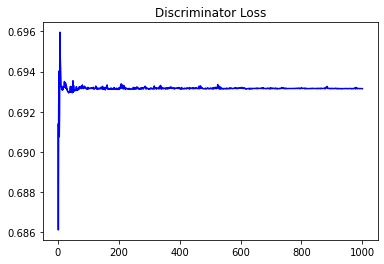

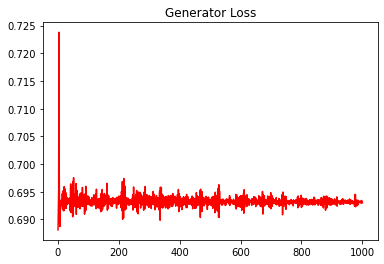

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0974665171405479


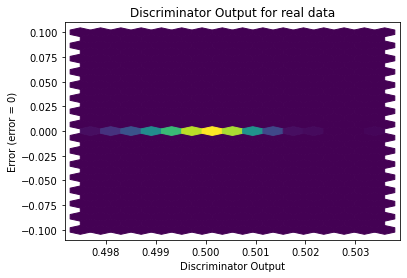

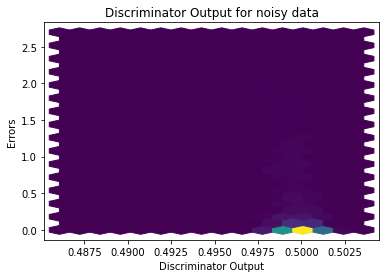

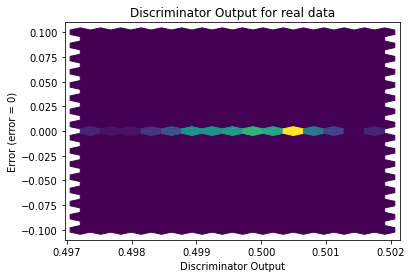

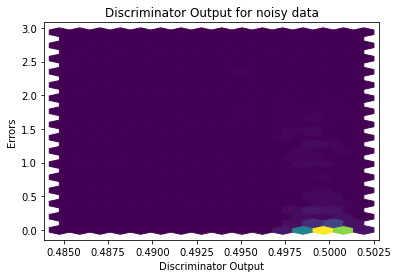

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


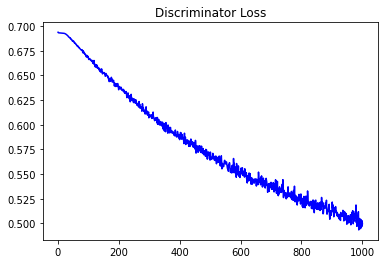

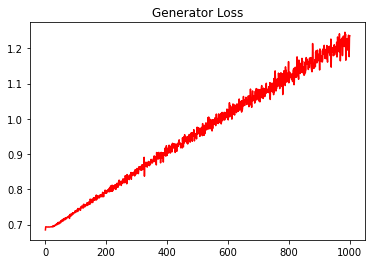

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08970500777217964


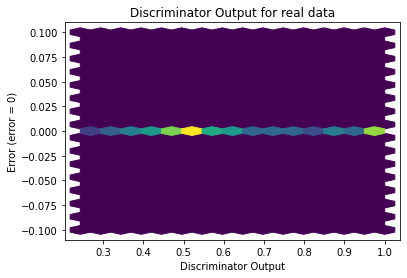

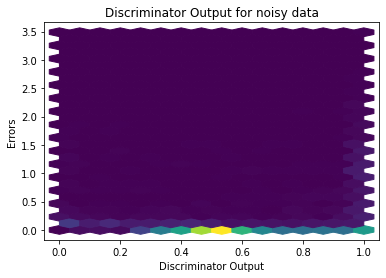

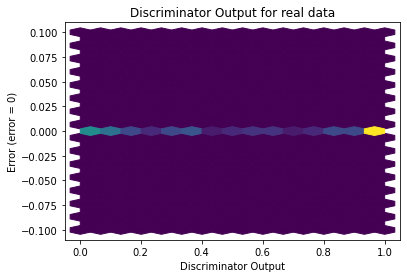

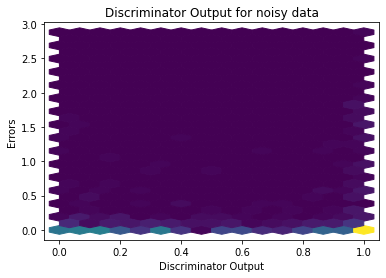

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
